In [1]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

import os
import neat
import matplotlib.pyplot as plt
from drawnetwork import *

import random

In [3]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

def run(config_file,seed,node_names):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    # p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    # p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    # winner = p.run(eval_genomes, 300)
    for cnt in range(300):
        winner = p.run(eval_genomes, 1)
#         if (cnt+1)%50 == 0:
#             draw_network(winner,config,seed,node_names)
        if (winner.fitness >= config.fitness_threshold):
            break

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

#     p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
#     p.run(eval_genomes, 10)
    
    return config,winner,stats

In [12]:
seed = 42
random.seed(seed)


# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]

xor_inputs = [(int(100.0*random.random()),int(100.0*random.random())) for i in range(4)]
xor_outputs = [(int(100.0*random.random()),) for i in range(4)]


node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}

# Determine path to configuration file. This path manipulation is
# here so that the script will run successfully regardless of the
# current working directory.
local_dir = './'  # os.path.dirname(__file__)
config_path = os.path.join(local_dir, 'config-feedforward')
config,winner,stats = run(config_path,seed,node_names)


Best genome:
Key: 4
Fitness: -4479.0
Nodes:
	0 DefaultNodeGene(key=0, bias=0.8734043853794468, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=0.24821344932841446, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=0.3765998586879102, enabled=True)

Output:
input (63, 2), expected output (42,), got [1.0]
input (27, 22), expected output (2,), got [1.0]
input (73, 67), expected output (21,), got [1.0]
input (89, 8), expected output (50,), got [1.0]


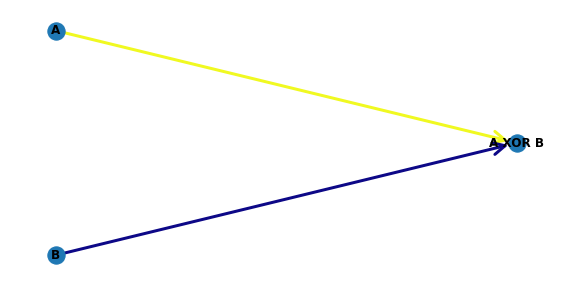

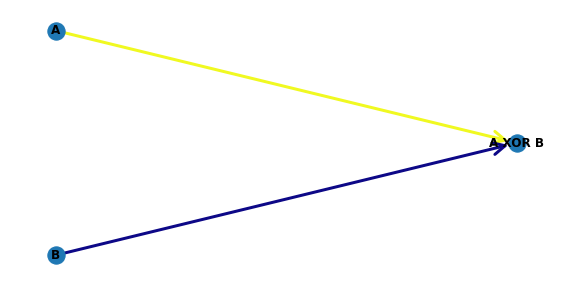

In [13]:
show_disabled = True
draw_network(winner,config,show_disabled,seed,node_names)

show_disabled = False
draw_network(winner,config,show_disabled,seed,node_names)